# ML Fondamentals - MLDM & DSC first year Master
# Decision Trees

The Scikit-Learn documentation on Decision Trees can be found here: http://scikit-learn.org/stable/modules/tree.html

In this lab, we are going to use 2 classic datasets, coming from the [UCI](https://archive.ics.uci.edu/ml/index.php) databases.

## Car data
In this dataset, it is a question of the acceptability of cars according to 6 criteria (so our data is in dimension 6, to which is added a seventh corresponding to the class).

The 1726 data are sorted into 4 classes: not acceptable (*unacc*), acceptable (*acc*), good (*good*), very good (*vgood*). For more details, the web page describing the data can be found [here](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).
### Data recovery and preparation

We first need to retrieve the data - available in the form of a .csv - (a line in a notebook starting with '!' authorizes the use of any shell command):

In [208]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data 
    #only for linux (and apple?) users... The others have to see how to download the data and store it in this folder

--2023-02-07 13:03:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data.2’

car.data.2          100%[===================>]  50.65K  --.-KB/s    in 0.1s    

2023-02-07 13:03:29 (396 KB/s) - ‘car.data.2’ saved [51867/51867]



The data is structured this way:
- one data per line
- each line is composed of the respective values for each attribute, separated by commas
- the last value is the class

In [209]:
! cat car.data
#only for linux (and apple?) users... The others have to see how to visualize the data

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
vhigh,vhigh,2,more,med,high,unacc
vhigh,vhigh,2,more,big,low,unacc
vhigh,vhigh,2,more,big,med,unacc
vhigh,vhigh,2,more,big,high,unacc
vhigh,vhigh,3,2,small,low,unacc
vhigh,vhigh,3,2,small,med,unacc
vhigh,vhigh,3,2,small,high,unacc
vhigh,vhigh,3,2,med,low,unacc
vhigh,vhi

Avant de commencer, on peut analyser les données en regardant leurs caractéristiques :

<p>Nombre d'attribus: 6</p>
<p>Valeurs d'attribut manquantes : aucune</p>
<table>
<thead>
<tr>
<th>Attribut</th>
<th>Valeurs</th>
</tr>
</thead>
<tbody>
<tr>
<td>buying</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>maint</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>doors</td>
<td>2, 3, 4, 5-more</td>
</tr>
<tr>
<td>persons</td>
<td>2, 4, more</td>
</tr>
<tr>
<td>lug_boot</td>
<td>small, med, big</td>
</tr>
<tr>
<td>safety</td>
<td>low, med, high</td>
</tr>
</tbody>
</table>

<p>Nombre de données : 1728 </p>
<table>
<thead>
<tr>
<th>classe</th>
<th>Nombre</th>
<th>Nombre[%]</th>
</tr>
</thead>
<tbody>
<tr>
<td>unacc</td>
<td>1210</td>
<td>70.023 %</td>
</tr>
<tr>
<td>acc</td>
<td>384</td>
<td>22.222 %</td>
</tr>
<tr>
<td>good</td>
<td>69</td>
<td>3.993 %</td>
</tr>
<tr>
<td>v-good</td>
<td>65</td>
<td>3.762 %</td>
</tr>
</table>
<p>Nous avons donc des données très déséquilibrées au niveau des classes.</p>
<p>Pour pouvoir travailler avec, il nous faut commencer par mettre les données dans un format utile à scikit-learn :</p>

Before starting, we can analyze the data by looking at their characteristics:

<p>Number of attributes: 6</p>
<p>Missing values : aucune</p>
<table>
<thead>
<tr>
<th>Attribute</th>
<th>Values</th>
</tr>
</thead>
<tbody>
<tr>
<td>buying</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>maint</td>
<td>v-high, high, med, low</td>
</tr>
<tr>
<td>doors</td>
undefined, 3, 4, 5-more</td>
</tr>
<tr>
<td>persons</td>
undefined, 4, more</td>
</tr>
<tr>
<td>lug_boot</td>
<td>small, med, big</td>
</tr>
<tr>
<td>safety</td>
<td>low, med, high</td>
</tr>
</tbody>
</table>

<p>Number of data : 1728 </p>
<table>
<thead>
<tr>
<th>class</th>
<th>Number</th>
<th>Number[%]</th>
</tr>
</thead>
<tbody>
<tr>
<td>unacc</td>
undefined</td>
undefined.023 %</td>
</tr>
<tr>
<td>acc</td>
undefined</td>
undefined.222 %</td>
</tr>
<tr>
<td>good</td>
undefined</td>
undefined.993 %</td>
</tr>
<tr>
<td>v-good</td>
undefined</td>
undefined.762 %</td>
</tr>
</table>
<p>There exists thus a huge difference between classes.</p>
<p>To use this dataset, we first need to transform it into a scikit-learn format:</p>

In [210]:
import numpy as np

nom_attributs = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
# get data in strings format:
donnees = np.genfromtxt(fname = "car.data", delimiter = ',', dtype="U")
X_string = donnees[:, :-1]

# Transformation into float
from sklearn.preprocessing import OrdinalEncoder
codage = OrdinalEncoder()
codage.fit(X_string)
X = codage.transform(X_string)
X = X.astype(int) #transform float into int

In [211]:
print(X_string)

[['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]


In [212]:
print(X)

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


**Q.** Do the same with the classes to obtain a vector *y* of integers.

In [213]:
# your turn
nom_classes = ["unacc", "acc", "good", "v-good"]
# get the array of class
y_string = donnees[:, -1:]
# transform them into integer
codage_y = OrdinalEncoder()
codage_y.fit(y_string)
y = codage_y.transform(y_string)
y = y.astype(int)

In [214]:
print(y_string)

[['unacc']
 ['unacc']
 ['unacc']
 ...
 ['unacc']
 ['good']
 ['vgood']]


In [215]:
print(y)

[[2]
 [2]
 [2]
 ...
 [2]
 [1]
 [3]]


In [216]:
dir(codage_y)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_get_feature',
 '_get_param_names',
 '_get_tags',
 '_missing_indices',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_data',
 'categories',
 'categories_',
 'dtype',
 'fit',
 'fit_transform',
 'get_params',
 'handle_unknown',
 'inverse_transform',
 'n_features_in_',
 'set_params',
 'transform',
 'unknown_value']

In [217]:
help(codage_y.fit)

Help on method fit in module sklearn.preprocessing._encoders:

fit(X, y=None) method of sklearn.preprocessing._encoders.OrdinalEncoder instance
    Fit the OrdinalEncoder to X.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        The data to determine the categories of each feature.
    
    y : None
        Ignored. This parameter exists only for compatibility with
        :class:`~sklearn.pipeline.Pipeline`.
    
    Returns
    -------
    self : object
        Fitted encoder.



### Learning decision trees
#### Pre-processing
Now that they have a format acceptable to scikit-learn, we will split the data into a test set and a training set. Do you remember the train_test_split function?.

In [218]:
# your turn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=33)


We will use the *sklearn.tree.DecisionTreeClassifier* class which contains everything needed for supervised classification using decision trees. You can find its documentation here: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

To use without moderation !

#### Learning
Let's start by creating an instance of the class:

In [219]:
from sklearn.tree import DecisionTreeClassifier
# the parameter is the random seed in order to reproduce the result found.
clf = DecisionTreeClassifier(random_state=42)

Now that the classifier has been created, we need to train it on the data, i.e. perform the training:

In [220]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Let's evaluate the performance on the test sample:

In [221]:
print("Accuracy (rate of correct classification) : %f" %clf.score(X_test, y_test))

# Calcul du F-score
from sklearn.metrics import f1_score
y_predits = clf.predict(X_test)

# The parameter average in the f1_score determines how the F1 score will be 
# computed for multi-class classification problems. 

#    'binary': Computes the average F1 score between each class and its complement.
#    This is appropriate when there are only two classes.

#    'macro': Computes the unweighted mean of the F1 scores for each class. 
#     This gives equal weight to each class, regardless of its size or the number 
#     of samples it contains.

#   'micro': Computes a single global F1 score for the entire confusion matrix by
#    counting the total number of true positives, false positives, and false negatives. 
#   This is appropriate when you want to treat all classes equally, regardless of their size.

print("F-score global : %f " %f1_score(y_test, y_predits, average='micro'))
print("F-score global (weighted) : %f " %f1_score(y_test, y_predits, average='macro'))
F_scores = f1_score(y_test, y_predits, average=None)
for i in range(4):
    print("F-score for the class %i : %f" %(i, F_scores[i]))

Accuracy (rate of correct classification) : 0.976879
F-score global : 0.976879 
F-score global (weighted) : 0.941074 
F-score for the class 0 : 0.957346
F-score for the class 1 : 0.862745
F-score for the class 2 : 0.991826
F-score for the class 3 : 0.952381


It's not bad, right?

#### Display
The advantage of decision trees is that they offer a graphical representation. But to be able to display it, we will need to install 2 additional packages:

In [222]:
!pip3 install pydotplus --user
!pip3 install graphviz --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We can then display the learned tree. As we will often need to display a tree, we create a function:

In [223]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

def affiche_arbre(classifieur, nom_attributs):
    dot_data = export_graphviz(classifieur,
                            feature_names=nom_attributs,
                            out_file=None,
                            filled=True,
                            rounded=True)
    return pydotplus.graph_from_dot_data(dot_data)

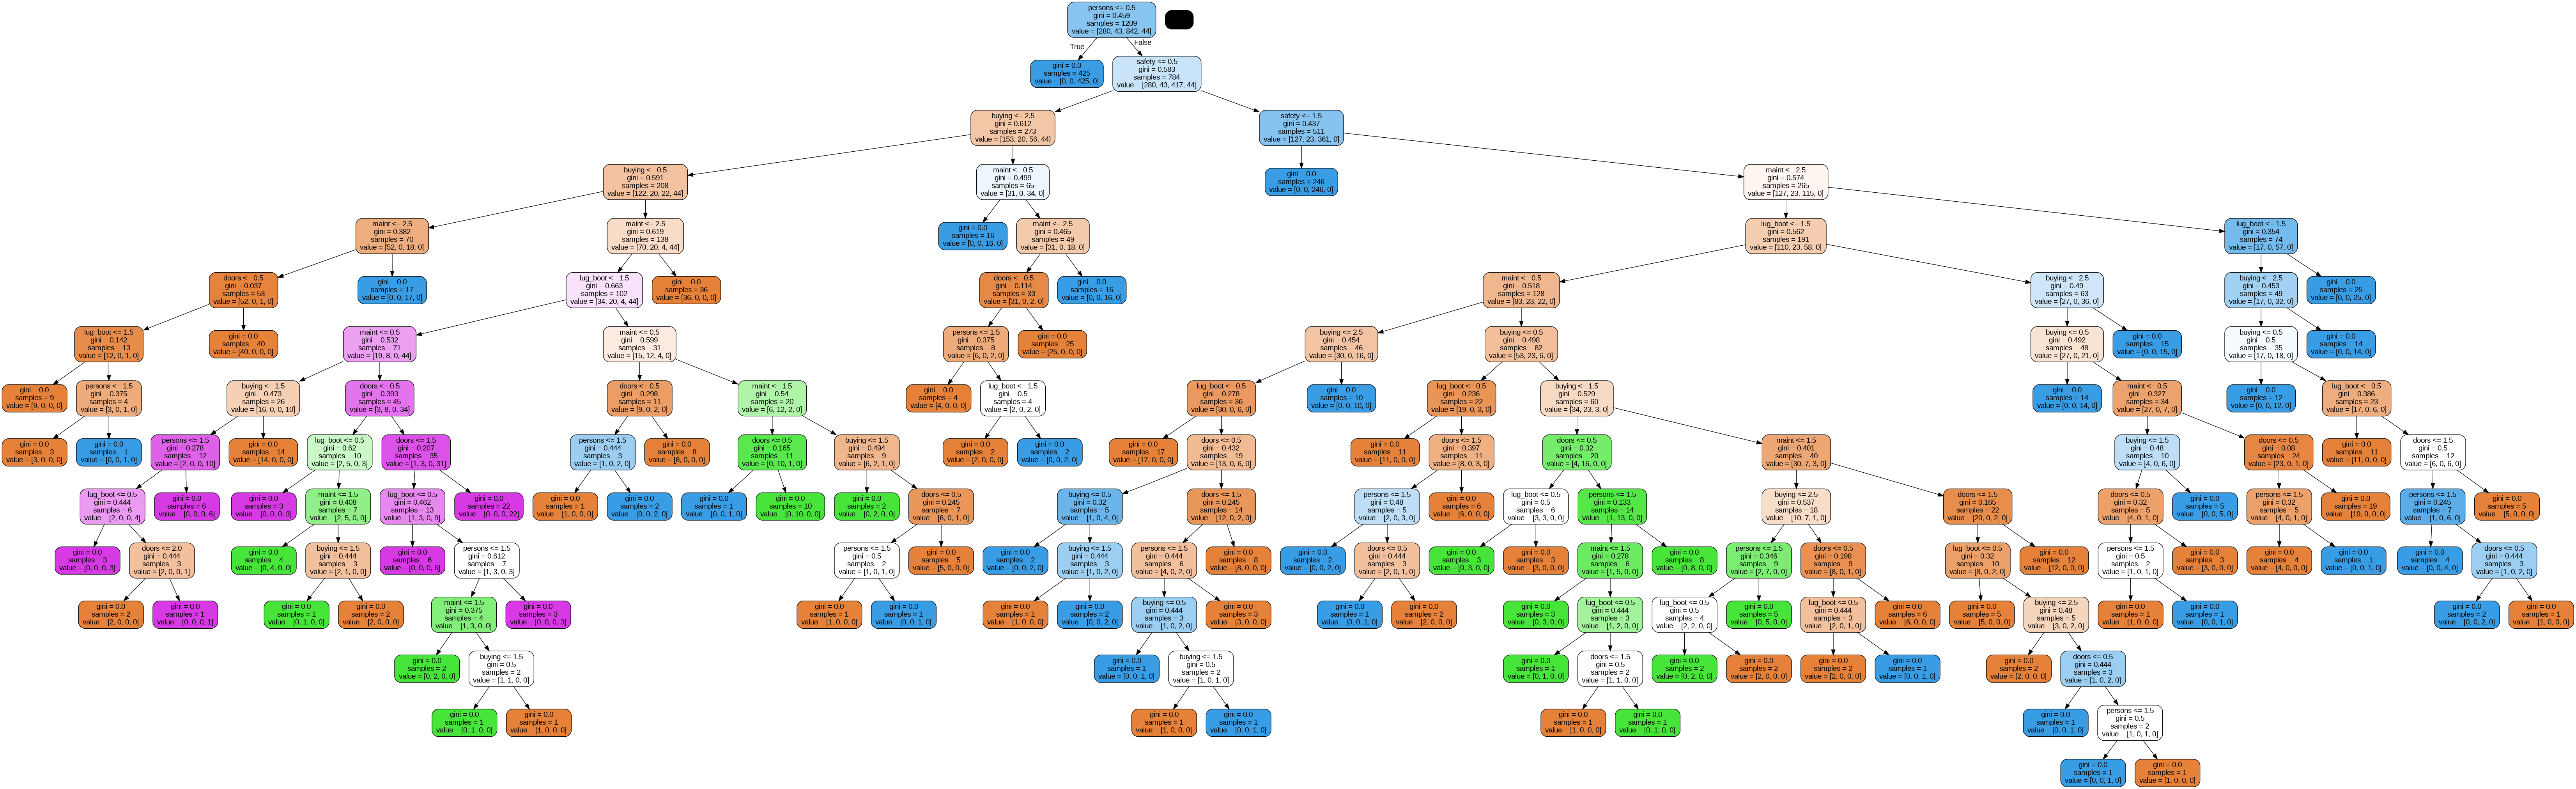

In [224]:
graph = affiche_arbre(clf, nom_attributs) 
Image(graph.create_png())

## Cross Validation

If you were curious, you may have already tried this:

In [225]:
clf

DecisionTreeClassifier(random_state=42)

In [226]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_

So there are 13 initialization parameters for the classifier. We propose to study the impact of 3 of them on learning:
- *criterion* which by default is 'gini' but can also be 'entropy'
- *max_depth* which allows to prune the tree by stopping the recursive call of the learning algorithm when the current node is at this depth
- *max_leaf_nodes* which also prunes the tree by keeping only this number of leaves (the purest ones, i.e. with the least data of different classes)

The data on the cars being too simple to appreciate the power of the decision trees, we will use another one: the *digits*, already included into scikit-learn:

In [227]:
from sklearn.datasets import load_digits  #importation de la commande
digits = load_digits()
X = digits.data
y = digits.target

It's time to see if you've followed this far. You need to: set aside 30% for the test, create a classifier based on decision trees, learn it on the training data, calculate the rate of good classification, and the different variants of the F-score on the 10 digit classes using test data.

In [228]:
from sklearn.model_selection import train_test_split

# set aside 30% for the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=33)

# create a classifier based on decision trees
clf = DecisionTreeClassifier(random_state=1)

# learn it on the trainingd data 
clf.fit(X_train, y_train)

# calculate the rate of good classification
y_predict = clf.predict(X_test)
print(f'Accuracy (rate of correct classification) : {clf.score(X_test, y_test)}')
model_f1_score = f1_score(y_test, y_predict, average="micro")
print("f1 score for the model: ", model_f1_score)

# and the different variants of the F-score on the 10 digit classes
F_scores = f1_score(y_test, y_predict, average=None)
for i in range(10):
  print(f'F-score for the class {i} : {F_scores[i]}')

Accuracy (rate of correct classification) : 0.8166666666666667
f1 score for the model:  0.8166666666666667
F-score for the class 0 : 0.9230769230769231
F-score for the class 1 : 0.7804878048780488
F-score for the class 2 : 0.8073394495412843
F-score for the class 3 : 0.8103448275862069
F-score for the class 4 : 0.7954545454545455
F-score for the class 5 : 0.9142857142857143
F-score for the class 6 : 0.9268292682926829
F-score for the class 7 : 0.8695652173913044
F-score for the class 8 : 0.6491228070175439
F-score for the class 9 : 0.7226890756302521


Now that we have measured the quality for the default values ​​of the hyperparameters, we will perform **cross-validation** on the training set (*train*). Once we have found the best parameters, we will train a tree on the complete training set with these parameters and we will evaluate the quality of this final training on the test set.

We start by evaluating the impact of the test choice criterion (*criteriom*):

In [229]:
from sklearn.model_selection import cross_val_score

clf_gini = DecisionTreeClassifier(random_state=42)
success_gini = cross_val_score(clf_gini, X_train, y_train, cv=10)
f1_gini = cross_val_score(clf_gini, X_train, y_train, cv = 10, scoring = 'f1_macro')
print(f'For gini :\n \t Accuracy : {success_gini.mean()} (+/-) {success_gini.std()}\n \
      \t F-score (global) : {f1_gini.mean()} (+/-) {f1_gini.std()}\n')


For gini :
 	 Accuracy : 0.8361142857142857 (+/-) 0.037379129669443206
       	 F-score (global) : 0.8341473250347082 (+/-) 0.03699858403790329



In [230]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
success_entropy = cross_val_score(clf_entropy, X_train, y_train, cv=10)
f1_entropy = cross_val_score(clf_entropy, X_train, y_train, cv=10, scoring='f1_macro')
print(f'For the entropy :\n \t Accuracy : {success_entropy.mean()} (+/-) {success_entropy.std()}\n \
    \t F-score (global) : {f1_entropy.mean()} (+/-) {f1_entropy.std()}\n')

For the entropy :
 	 Accuracy : 0.8312761904761905 (+/-) 0.02818503021899127
     	 F-score (global) : 0.8276177027192336 (+/-) 0.029321408416438013



The gini has a better accuracy and F-score but it also has a greater dispersion compare to the entropy.
Nontheless, it seems that gini is best because we can reach a better accuracy than with the entropy.

What to deduce? Is the entropy statistically better on this dataset? Choose a 

criterion: this will be the only one that will be used later.

We must now look at the impact of the other 2 parameters:
- *max_depth* that we will vary between 5 and 20
- *max_leaf_nodes* that we want to vary between 20 and 200 in steps of 20 (i.e. 20, 40, 60, ..., 200).
We propose to study the impact of these parameters independently, with entropy as a selection criterion.

It will be necessary to produce 4 curves showing the evolutions of the success rate and the overall F-score with each of the parameters. It will also be necessary to show the standard deviation on the curves: the use of the pyplot *errorbar* function (https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar) is strongly recommended.

In [231]:
def model_evaluation(clf):
  """
  Compute and return the success_rate and the f_score of the model
  given as input.
  """
  # learn it on the training set
  clf.fit(X_train, y_train)
  # compute the success rate and the overall F-score
  y_predict = clf.predict(X_test)
  success_rate = clf.score(X_test, y_test)
  f_score = f1_score(y_test, y_predict, average='micro')

  return (success_rate, f_score)

In [232]:
"""
Compute the success rate and the f_score for differents values of max_depth and
then diferents values of max_leaf_nodes.
"""
success_rates_depth = []
f_scores_depth = []
x_depth = [i for i in range(5, 21)]

for max_depth in x_depth:
  clf = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=max_depth)
  res = model_evaluation(clf)
  success_rates_depth += [res[0]]
  f_scores_depth += [res[1]]


success_rates_nodes = []
f_scores_nodes = []
x_nodes = [i for i in range(20,201,20)]

for max_leaf_nodes in x_nodes:
  clf = DecisionTreeClassifier(criterion="entropy", random_state=42, max_leaf_nodes=max_leaf_nodes)
  res = model_evaluation(clf)
  success_rates_nodes += [res[0]]
  f_scores_nodes += [res[1]]

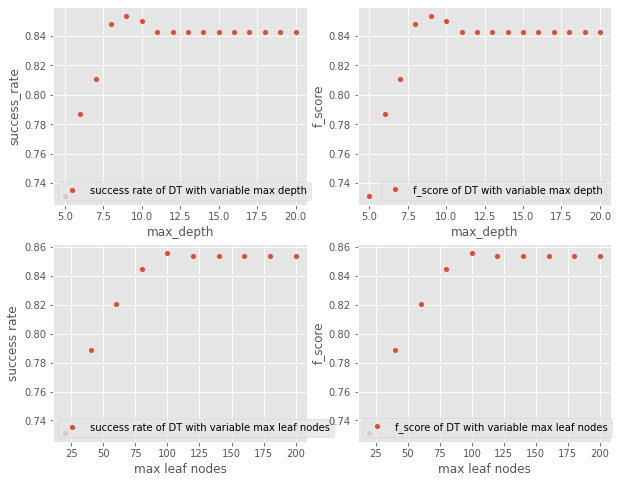

In [233]:
"""
Draw the errorbar of the data collected in the previous cell.
"""
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# create 4 subplot
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# draw the errorbar
def set_legend(row, col, xlabel, ylabel):
  """
  Set the xlabel and ylabel of the subplots(row, col)
  created above.
  """
  ax[row, col].set_xlabel(xlabel)
  ax[row, col].set_ylabel(ylabel)
  ax[row, col].legend()


ax[0, 0].errorbar(
    x_depth, success_rates_depth, 
    fmt='o', markersize=4, capsize=4,
    label="success rate of DT with variable max depth"
)
set_legend(0, 0, "max_depth", "success_rate")

ax[0, 1].errorbar(
    x_depth, f_scores_depth,
    fmt='o', markersize=4, capsize=4,
    label="f_score of DT with variable max depth"  
)
set_legend(0, 1, "max_depth", "f_score")

ax[1, 0].errorbar(
    x_nodes, success_rates_nodes,
    fmt='o', markersize=4, capsize=4,
    label="success rate of DT with variable max leaf nodes"
)
set_legend(1, 0, "max leaf nodes", "success rate")

ax[1, 1].errorbar(
    x_nodes, f_scores_nodes,
    fmt='o', markersize=4, capsize=4,
    label="f_score of DT with variable max leaf nodes"  
)
set_legend(1, 1, "max leaf nodes", "f_score")



plt.show()

Deduce the optimal values ​​of the 2 parameters and use them to learn a decision tree on the entire training set, then evaluate the quality of learning on the test set.

max_depth = 9

max_leaf_nodes = 100

In [234]:
# Your turn
clf = DecisionTreeClassifier(criterion="entropy", max_depth=9, max_leaf_nodes=100, random_state=42)
success_rate, f_score = model_evaluation(clf)

print(f'Results:\n \t- sucess rate : {success_rate}\n\t- F-score : {f_score}')

Results:
 	- sucess rate : 0.8555555555555555
	- F-score : 0.8555555555555555


## Data Preparation & Random Forests
We continue to increase the difficulty, this time downloading a dataset from Portuguese banks, described [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing):

In [235]:
! wget https://remieyraud.github.io/bank-additional.csv

--2023-02-07 13:03:44--  https://remieyraud.github.io/bank-additional.csv
Resolving remieyraud.github.io (remieyraud.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to remieyraud.github.io (remieyraud.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 583898 (570K) [text/csv]
Saving to: ‘bank-additional.csv.2’

bank-additional.csv 100%[===================>] 570.21K  --.-KB/s    in 0.04s   

2023-02-07 13:03:44 (13.1 MB/s) - ‘bank-additional.csv.2’ saved [583898/583898]



### Pandas
Unlike car data, we are going to use a very useful python package to prepare and perform a first data analysis: *pandas*. It is possible that this package is not installed on the machines:

In [236]:
! pip3 install pandas --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


You can then import the package, then use the function that allows you to transform a csv file like the one you just downloaded into a *dataframe*. This type, unique to *pandas*, allows data to be presented in a very useful form.

In [237]:
import pandas as pd
df = pd.read_csv('./bank-additional.csv', sep=';')

In [238]:
dir(pd)

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p18',
 '_testing',
 '_tslib',
 '_typing',
 

In [239]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

Now that we have a dataframe, we can easily see what the data looks like, by looking at the first 4:

In [240]:
df.head(4)

age          job  marital    education default  housing     loan  \
0   30  blue-collar  married     basic.9y      no      yes       no   
1   39     services   single  high.school      no       no       no   
2   25     services  married  high.school      no      yes       no   
3   38     services  married     basic.9y      no  unknown  unknown   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  

[4 rows x 21 columns]

We can transpose it to read it more simply:

In [241]:
np.transpose(df.head())

0            1            2            3  \
age                      30           39           25           38   
job             blue-collar     services     services     services   
marital             married       single      married      married   
education          basic.9y  high.school  high.school     basic.9y   
default                  no           no           no           no   
housing                 yes           no          yes      unknown   
loan                     no           no           no      unknown   
contact            cellular    telephone    telephone    telephone   
month                   may          may          jun          jun   
day_of_week             fri          fri          wed          fri   
duration                487          346          227           17   
campaign                  2            4            1            3   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate           -1.8          1.1          1.4          1.4   
cons.price.idx       92.893       93.994       94.465       94.465   
cons.conf.idx         -46.2        -36.4        -41.8        -41.8   
euribor3m             1.313        4.855        4.962        4.959   
nr.employed          5099.1       5191.0       5228.1       5228.1   
y                        no           no           no           no   

                                4  
age                            47  
job                        admin.  
marital                   married  
education       university.degree  
default                        no  
housing                       yes  
loan                           no  
contact                  cellular  
month                         nov  
day_of_week                   mon  
duration                       58  
campaign                        1  
pdays                         999  
previous                        0  
poutcome              nonexistent  
emp.var.rate                 -0.1  
cons.price.idx               93.2  
cons.conf.idx               -42.0  
euribor3m                   4.191  
nr.employed                5195.8  
y                              no

In [242]:
df.shape

(4119, 21)

There are therefore 4119 data, each being described by 20 attributes, the final column *y* containing the target to learn. This class can take 2 values: *no* or *yes*. For the bank, it was a question of who to offer life insurance to.

What can we say about numerical attributes? Dataframes give us easy access to descriptive statistics:

In [243]:
df.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.400000       92.201000     -50.800000     0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000     1.334000  5099.100000  
50%        1.100000       93.749000     -41.800000     4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.961000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

Are these classes fairly represented in the data?

In [244]:
df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

There is therefore a class much more present than the other in the data. It will therefore be necessary to pay attention to how we are going to evaluate the learning in order to take this into account.

You have to put the data in scikit-learn form, but this time it will be easier thanks to *pandas*:

In [245]:
X = df.drop(['y'], axis=1)
y = df['y']
np.transpose(X.head())

0            1            2            3  \
age                      30           39           25           38   
job             blue-collar     services     services     services   
marital             married       single      married      married   
education          basic.9y  high.school  high.school     basic.9y   
default                  no           no           no           no   
housing                 yes           no          yes      unknown   
loan                     no           no           no      unknown   
contact            cellular    telephone    telephone    telephone   
month                   may          may          jun          jun   
day_of_week             fri          fri          wed          fri   
duration                487          346          227           17   
campaign                  2            4            1            3   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate           -1.8          1.1          1.4          1.4   
cons.price.idx       92.893       93.994       94.465       94.465   
cons.conf.idx         -46.2        -36.4        -41.8        -41.8   
euribor3m             1.313        4.855        4.962        4.959   
nr.employed          5099.1       5191.0       5228.1       5228.1   

                                4  
age                            47  
job                        admin.  
marital                   married  
education       university.degree  
default                        no  
housing                       yes  
loan                           no  
contact                  cellular  
month                         nov  
day_of_week                   mon  
duration                       58  
campaign                        1  
pdays                         999  
previous                        0  
poutcome              nonexistent  
emp.var.rate                 -0.1  
cons.price.idx               93.2  
cons.conf.idx               -42.0  
euribor3m                   4.191  
nr.employed                5195.8

### Random forest
Now that the data is prepared for scikit-learn, it's your turn! But we are going to use random forests instead of decision trees.

Scikit-learn also incorporates [random forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Repeat the previous exercise with this classifier, looking at the hyper-parameter *n_estimators*

You must therefore :

1. Transform data to handle attributes that are not numeric,
2. Cut them out (take 30% for the test set),
3. Find the best possible values ​​for the parameter *n_estimator* (test ten of them, evenly distributed between 50 and 600, using cross-validation),
4. Learn on the training set with this optimal value,
5. Calculate the quality measures (error rate and F-score) on the test set

In [246]:
"""
Transform the following data into integer:
  - job 1
  - marital 2
  - education 3
  - contact 7
  - month 8
  - day of a week 9
"""
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# specify columns indices with categorical values to transform
index = [1, 2, 3, 4, 5, 6,  7, 8, 9, 14]
names = ['job', 'marital', 'education', 'default', 'housing', 'loan',  'contact', 'month', 'day_of_week', 'poutcome']

# create a ColumnTranfformer with the OrdinalEncoder applied to the categorical columns
column_encoder = ColumnTransformer(transformers=[("encoder", OrdinalEncoder(), index)])

# Fit and transform the array with the ColumnTransformer
X_encoded =column_encoder.fit_transform(X)

# Transform the numpy array into a pandas dataFrame
X_encoded = pd.DataFrame(X_encoded, columns=names)

# Concatenate the numerical columns back to the transformed data
numerical_columns = [i for i in X.columns if i not in names]
#X_encoded = pd.concat([X_encoded[names]], axis=1, join='inner')
X_encoded = pd.concat([X_encoded, X[numerical_columns]], axis=1, join='inner')

In [247]:
print(X_encoded)
X_encoded.shape

      job  marital  education  default  housing  loan  contact  month  \
0     1.0      1.0        2.0      0.0      2.0   0.0      0.0    6.0   
1     7.0      2.0        3.0      0.0      0.0   0.0      1.0    6.0   
2     7.0      1.0        3.0      0.0      2.0   0.0      1.0    4.0   
3     7.0      1.0        2.0      0.0      1.0   1.0      1.0    4.0   
4     0.0      1.0        6.0      0.0      2.0   0.0      0.0    7.0   
...   ...      ...        ...      ...      ...   ...      ...    ...   
4114  0.0      1.0        1.0      0.0      2.0   2.0      0.0    3.0   
4115  0.0      1.0        3.0      0.0      2.0   0.0      1.0    3.0   
4116  8.0      2.0        3.0      0.0      0.0   0.0      0.0    6.0   
4117  0.0      1.0        3.0      0.0      0.0   0.0      0.0    1.0   
4118  4.0      2.0        3.0      0.0      2.0   0.0      0.0    7.0   

      day_of_week  poutcome  age  duration  campaign  pdays  previous  \
0             0.0       1.0   30       487        

(4119, 20)

In [248]:
"""
Cut the data set with : 0.7 train data and 0.3 test data
"""
from sklearn.model_selection import train_test_split

# set aside 30% for the test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3,  random_state=42)

In [249]:
print(X_train)

      job  marital  education  default  housing  loan  contact  month  \
926   1.0      1.0        2.0      0.0      2.0   0.0      0.0    0.0   
3855  9.0      1.0        5.0      0.0      0.0   0.0      1.0    6.0   
997   1.0      1.0        1.0      1.0      2.0   2.0      1.0    6.0   
3128  1.0      1.0        2.0      1.0      0.0   0.0      1.0    3.0   
1953  0.0      1.0        3.0      0.0      2.0   2.0      1.0    6.0   
...   ...      ...        ...      ...      ...   ...      ...    ...   
3444  6.0      1.0        2.0      0.0      0.0   0.0      0.0    1.0   
466   4.0      0.0        1.0      0.0      0.0   0.0      0.0    7.0   
3092  1.0      2.0        3.0      0.0      2.0   0.0      0.0    3.0   
3772  9.0      1.0        5.0      0.0      2.0   0.0      1.0    9.0   
860   1.0      2.0        5.0      0.0      0.0   0.0      0.0    6.0   

      day_of_week  poutcome  age  duration  campaign  pdays  previous  \
926           1.0       1.0   34       151        

In [255]:
"""
Find the best possible values ​​for the parameter n_estimator
(test ten of them, evenly distributed between 50 and 600, using cross-validation),
"""
from sklearn.ensemble import RandomForestClassifier
#rf_clf = RandomForestClassifier(n_estimators=10)

success_rates = []
f_scores = []

# train multiple random forest with a different n estimator parameter
for n in range(50, 600, 50):
  rf_clf = RandomForestClassifier(n_estimators=n)
  res = model_evaluation(rf_clf)
  success_rates += [res[0]]
  f_scores += [res[1]]


[0.9029126213592233, 0.8988673139158576, 0.9045307443365695, 0.9045307443365695, 0.901294498381877, 0.9021035598705501, 0.9004854368932039, 0.9021035598705501, 0.901294498381877, 0.9021035598705501, 0.901294498381877]
[0.9029126213592235, 0.8988673139158576, 0.9045307443365695, 0.9045307443365695, 0.901294498381877, 0.9021035598705501, 0.9004854368932039, 0.9021035598705501, 0.901294498381877, 0.9021035598705501, 0.901294498381877]


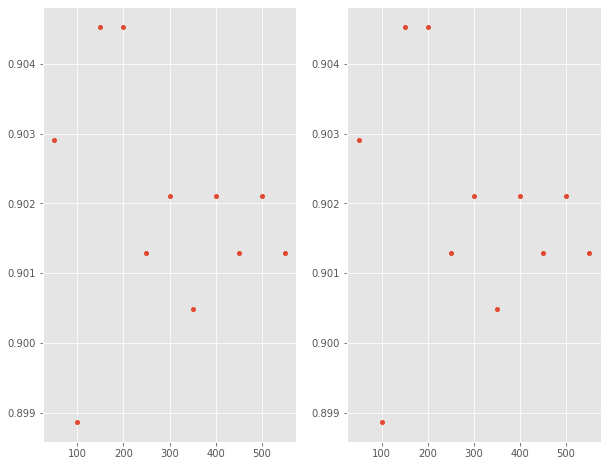

In [256]:
# draw the results 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# create 4 subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

abs = [n for n in range(50, 600, 50)]

ax[0].errorbar(
    abs, success_rates, 
    fmt='o', markersize=4, capsize=4,
    label="success rate of RF with variable n estimator"
)
print(success_rates)

ax[1].errorbar(
    abs, f_scores,
    fmt='o', markersize=4, capsize=4,
    label="f_score of RF with variable n estimator" 
)
print(f_scores)

The best value is for 150 and 200 n_estimator.


#### Feature Importances
Once you have found the best hyperparameters and train your classifier with them, you can access the attribute *feature_importances_* of the classifier: it will give you for each feature its impact on the classification of the Random Forest. This score is based on the number of decision trees that actually use this feature, weighted by its place in the trees (the closet to the root, the better importance).

1. Which feature is the most used?
2. Draw a plot with the features as horizontal coordinates and the corresponding importance as vertical one 

In [261]:
rf_clf = RandomForestClassifier(n_estimators=200)
res = model_evaluation(rf_clf)
print(res)
rf_clf.feature_importances_

(0.9004854368932039, 0.9004854368932039)


array([0.04541787, 0.02115437, 0.04031368, 0.00924164, 0.01625065,
       0.01300124, 0.01260656, 0.02316807, 0.0380198 , 0.03741558,
       0.07895332, 0.30387979, 0.03902923, 0.0331579 , 0.01825369,
       0.0267146 , 0.02990762, 0.03930444, 0.10674409, 0.06746585])

In [262]:
max_index = np.argmax(rf_clf.feature_importances_)
most_used_feature = X_encoded.columns[max_index]
print(most_used_feature)

duration


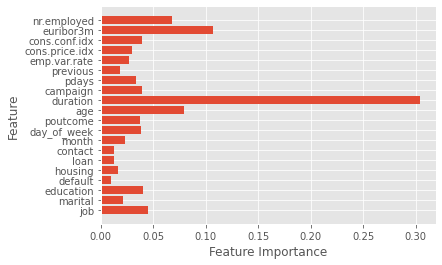

In [263]:
import matplotlib.pyplot as plt

plt.barh(X_encoded.columns, rf_clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()